## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [4]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [5]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [6]:
train = train[cols_subset]
test = test[cols_subset]

In [7]:
train.head()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.959434              -0.992165             0.977436   
1           -0.979289              -0.989876             0.984520   
2           -0.983703              -0.987868             0.986770   
3           -0.986542              -0.991241             0.986821   
4           -0.992827              -0.992882             0.987434   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.934724                     -0.993592             -0.841247   
1         -0.943068                     -0.998235             -0.844788   
2         -0.938692                     -0.999388             -0.848933   
3         -0.938692                     -0.999807             -0.848649   
4         -0.942469                     -0.999806             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.179941             -0.058627               0.142051        1   
1              0.180289             -0.054317              -0.692541        1   
2              0.180637             -0.049118              -0.727227        1   
3              0.181935             -0.047663              -0.599118        1   
4              0.185151             -0.043892              -0.676997        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [8]:
#поиск пропусков в датасете train
train.isna().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [9]:
#поиск пропусков в датасете test
test.isna().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [10]:
#поиск дубликатов в датасете train
train.duplicated().sum()

0

In [11]:
#поиск дубликатов в датасете test
test.duplicated().sum()

0

__Вывод:__ дубликатов строк и пропусков в данных нет

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

__По отдельности__

In [12]:
train.describe().T

count       mean       std       min       25%  \
tBodyAccMag-mean()            7352.0  -0.543884  0.477653 -1.000000 -0.983282   
tBodyGyroJerk-mad()-X         7352.0  -0.727735  0.315832 -0.999889 -0.991595   
tGravityAcc-min()-X           7352.0   0.678505  0.508656 -1.000000  0.804270   
tBodyAcc-max()-X              7352.0  -0.468604  0.544547 -1.000000 -0.936219   
fBodyAcc-bandsEnergy()-1,8.2  7352.0  -0.847963  0.233633 -1.000000 -0.999480   
angle(X,gravityMean)          7352.0  -0.489547  0.511807 -1.000000 -0.812065   
angle(Y,gravityMean)          7352.0   0.058593  0.297480 -1.000000 -0.017885   
angle(Z,gravityMean)          7352.0  -0.056515  0.279122 -1.000000 -0.143414   
fBodyAcc-skewness()-X         7352.0  -0.128562  0.403686 -0.931208 -0.486841   
subject                       7352.0  17.413085  8.975143  1.000000  8.000000   

                                    50%        75%        max  
tBodyAccMag-mean()            -0.883371  -0.106892   1.000000  
tBodyGyroJerk-mad()-X         -0.950268  -0.474625   1.000000  
tGravityAcc-min()-X            0.926693   0.965095   1.000000  
tBodyAcc-max()-X              -0.881637  -0.017129   1.000000  
fBodyAcc-bandsEnergy()-1,8.2  -0.986582  -0.764508   1.000000  
angle(X,gravityMean)          -0.709417  -0.509079   1.000000  
angle(Y,gravityMean)           0.182071   0.248353   0.478157  
angle(Z,gravityMean)           0.003181   0.107659   1.000000  
fBodyAcc-skewness()-X         -0.163271   0.155112   1.000000  
subject                       19.000000  26.000000  30.000000

__Вывод по таблице:__
Значения признака subject обозначает лишь номер участника, поэтому дальнейшие рассуждения не касаются этого признака
* Значения большинства величин отнормированы к диапазону от -1 до 1
* В первых пяти признаках (tBodyAccMag-mean(), tBodyGyroJerk-mad()-X,tGravityAcc-min()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2) из таблицы наблюдается значительно смещение среднего от медианы, что говорит о возможных выбросах (в случае признаков tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean) эти выбросы наблюдаются со стороны положительных значений признака)
* В признаках tBodyAccMag-mean(), tBodyGyroJerk-mad()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2, angle(X,gravityMean) очень "тяжелый" левый хвост: 50% значений сосредоточено в диапазоне от -1 до -0.88, в то время как признак tGravityAcc-min()-X, наоборот, имеет "тяжелый" левый хвост: 50% значений сосредоточено в диапазоне от 0.92 до 1 (что соответсвует реальности, где среднее гравитационное ускорение по законам физики равно 9.8)

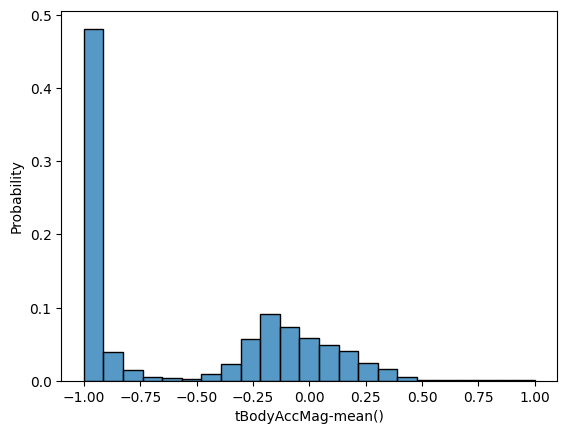

In [13]:
sns.histplot(train['tBodyAccMag-mean()'], stat = 'probability'); #свидетельство того, что возможны выбросы справа

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [14]:
#количество наблюдений для всех категорий активности в train
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [15]:
#разница в процентах между самой крупной категорией и самой маленькой в train
round((1 - train['Activity'].value_counts().min() / train['Activity'].value_counts().max())* 100)

30

In [16]:
#количество наблюдений для всех категорий активности в test
test['Activity'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [17]:
#разница в процентах между самой крупной категорией и самой маленькой в test
round((1 - test['Activity'].value_counts().min() / test['Activity'].value_counts().max())* 100)

22

__Вывод:__ данные в train не являются сбалансированными, данные в test сбалансированы

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [18]:
#переделаем целевую переменную (качественные данные) в числовые
train_new = train.copy()
train_new['Activity'] = train['Activity'].replace({'LAYING': 1, 'SITTING': 2, 'STANDING':3, 'WALKING':4, 'WALKING_DOWNSTAIRS':5, 'WALKING_UPSTAIRS':6})

In [19]:
train_new.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity                                0.833126               0.723257   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity                                 0.640311          0.819679   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity                                          0.660492   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)                      1.000000             -0.783848   
angle(Y,gravityMean)                     -0.783848              1.000000   
angle(Z,gravityMean)                     -0.643655              0.594885   
fBodyAcc-skewness()-X                     0.265523             -0.046213   
subject                                   0.026137             -0.009829   
Activity                                 -0.618504              0.725408   

                              angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
tBodyAccMag-mean()                        0.426283               0.379796   
tBodyGyroJerk-mad()-X                     0.380967               0.266002   
tGravityAcc-min()-X                       0.667415              -0.261676   
tBodyAcc-max()-X                          0.405023               0.335708   
fBodyAcc-bandsEnergy()-1,8.2              0.423927               0.260316   
angle(X,gravityMean)                     -0.643655               0.265523   
angle(Y,gravityMean)                      0.594885              -0.046213   
an

__Вывод:__
* Усредненная величина ускорения тела имеет высокую корреляцию с максимальной величиной ускорения тела по оси Х (так как ускорение по оси X делает вклад в ускорение в целом), с рывком (так как рывок считается как производная по ускорению) и с энергией ускорения тела (так как с увеличением скорости движения повышается энергия и частотность). Так же если учесть, что значения активности были изменены на числовые так, что с ростом интенсивности движения растет числовое значение активности, то усредненная величина ускорения тела также имеет высокую корреляцию с целевой переменной - чем интенсивнее нагрузка, тем больше ускорение (например, оно выше при подъеме на лестнице (близко к 1), но стремится к -1 при статических движениях - лежачем, сидячем и стоящем положениях.
* Асимметричность частоты ускорения тела по оси Х в целом имеет слабую корреляцию с другими величинами, однако наибольшую корреляцию она имеет с усредненной величиной ускорения тела - тем больше ускорение тела, тем больше асимметричность ускорения, то есть при все больших увеличениях скорости становится тяжелее при физической нагрузке и возрастает асимметричность в движении
* Чем больше минимум гравитационной составляющей ускорения по оси Х, тем меньше угол между осью Х и усредненной гравитационной составляющей ускорения, одновременно с этим растет угол между осью Y и усредненной гравитационной составляющей ускорения

In [20]:
#для test
test_new = test.copy()
test_new['Activity'] = test['Activity'].replace({'LAYING': 1, 'SITTING': 2, 'STANDING':3, 'WALKING':4, 'WALKING_DOWNSTAIRS':5, 'WALKING_UPSTAIRS':6})
test_new.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.934773   
tBodyGyroJerk-mad()-X                   0.934773               1.000000   
tGravityAcc-min()-X                     0.407084               0.393773   
tBodyAcc-max()-X                        0.965114               0.898628   
fBodyAcc-bandsEnergy()-1,8.2            0.767875               0.625414   
angle(X,gravityMean)                   -0.400871              -0.387274   
angle(Y,gravityMean)                    0.439051               0.423288   
angle(Z,gravityMean)                    0.425011               0.368411   
fBodyAcc-skewness()-X                   0.365670               0.278765   
subject                                -0.057359              -0.079811   
Activity                                0.843283               0.741270   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.407084          0.965114   
tBodyGyroJerk-mad()-X                    0.393773          0.898628   
tGravityAcc-min()-X                      1.000000          0.386764   
tBodyAcc-max()-X                         0.386764          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.301643          0.707129   
angle(X,gravityMean)                    -0.989043         -0.384454   
angle(Y,gravityMean)                     0.697006          0.410477   
angle(Z,gravityMean)                     0.633881          0.398008   
fBodyAcc-skewness()-X                   -0.237864          0.338543   
subject                                  0.004927         -0.071786   
Activity                                 0.636518          0.829569   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.767875   
tBodyGyroJerk-mad()-X                             0.625414   
tGravityAcc-min()-X                               0.301643   
tBodyAcc-max()-X                                  0.707129   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.279783   
angle(Y,gravityMean)                              0.327473   
angle(Z,gravityMean)                              0.446245   
fBodyAcc-skewness()-X                             0.293881   
subject                                          -0.090817   
Activity                                          0.715162   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.400871              0.439051   
tBodyGyroJerk-mad()-X                    -0.387274              0.423288   
tGravityAcc-min()-X                      -0.989043              0.697006   
tBodyAcc-max()-X                         -0.384454              0.410477   
fBodyAcc-bandsEnergy()-1,8.2             -0.279783              0.327473   
angle(X,gravityMean)                      1.000000             -0.668108   
angle(Y,gravityMean)                     -0.668108              1.000000   
angle(Z,gravityMean)                     -0.615114              0.425454   
fBodyAcc-skewness()-X                     0.235208             -0.087006   
subject                                   0.003138             -0.047553   
Activity                                 -0.607153              0.618168   

                              angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
tBodyAccMag-mean()                        0.425011               0.365670   
tBodyGyroJerk-mad()-X                     0.368411               0.278765   
tGravityAcc-min()-X                       0.633881              -0.237864   
tBodyAcc-max()-X                          0.398008               0.338543   
fBodyAcc-bandsEnergy()-1,8.2              0.446245               0.293881   
angle(X,gravityMean)                     -0.615114               0.235208   
angle(Y,gravityMean)                      0.425454              -0.087006   
an

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

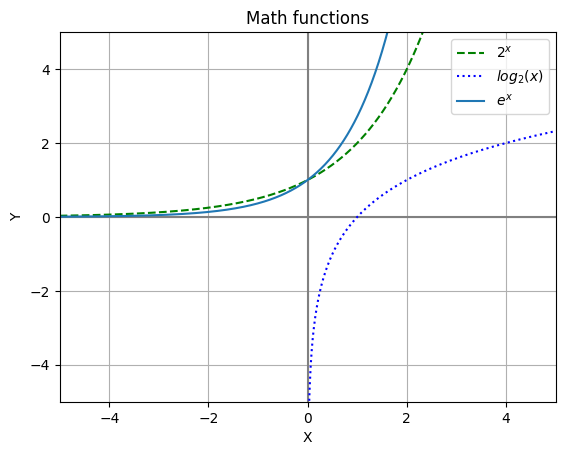

In [21]:
x_1 = np.arange(0, 100, 0.01)
x_2 = np.arange(-5, 5, 0.01)
plt.axvline(0, color = 'grey', linewidth=1.5)
plt.axhline(0, color = 'grey', linewidth=1.5)
plt.plot(x_2, 2**x_2, 'g--', label = '$2^{x}$')
plt.plot(x_1, np.log2(x_1), 'b:', label = '$log_2(x)$')
plt.plot(x_2, np.exp(x_2), label = '$e^x$')
plt.grid(True)
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.legend()
plt.title('Math functions')
plt.xlabel('X')
plt.ylabel('Y');

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

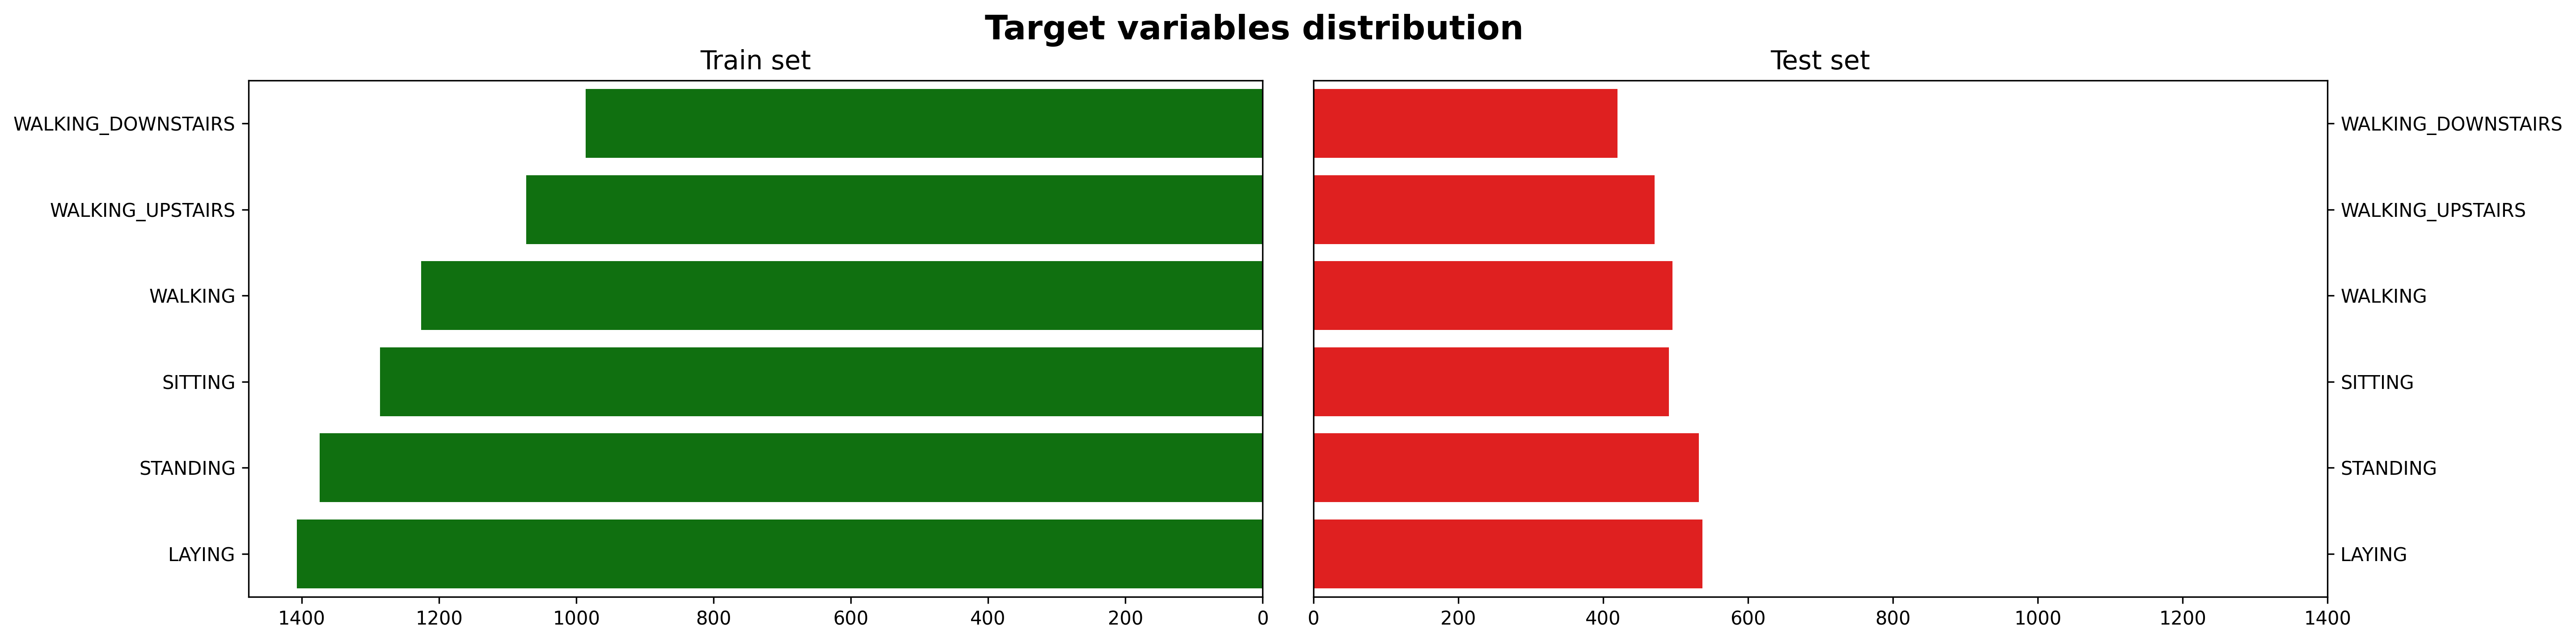

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(20, 5), dpi=300)
plt.suptitle('Target variables distribution', fontsize=18, fontweight="bold")

axs[0].set_title("Train set", fontsize=14)
sns.barplot(train['Activity'].value_counts(), orient = 'h', color = 'green', ax = axs[0])
axs[0].invert_xaxis()
axs[0].invert_yaxis()
axs[0].yaxis.tick_left()
axs[0].set_xlabel('')

axs[1].set_title("Test set", fontsize=14)
sns.barplot(test['Activity'].value_counts(), orient = 'h', color = 'red', ax = axs[1])
plt.xlim(0, 1400)
plt.xlabel('')
axs[1].yaxis.set_tick_params(which='both', labelbottom=True)
axs[1].invert_yaxis()
axs[1].yaxis.tick_right()

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

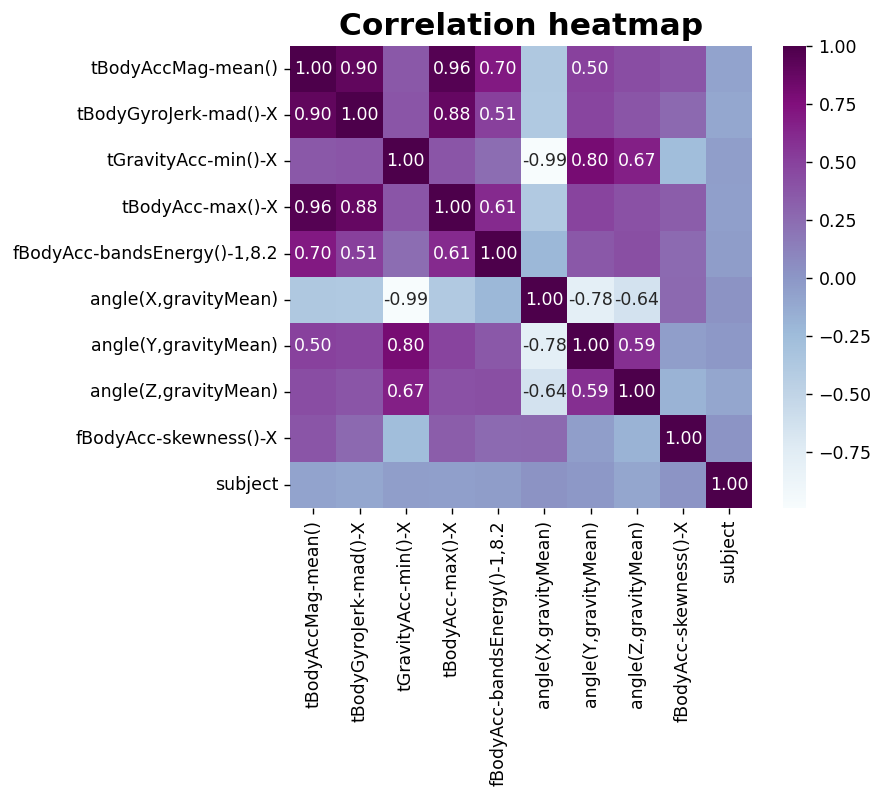

In [23]:
plt.figure(dpi=125)
ax = sns.heatmap(train.corr(), cmap="BuPu", annot=True, fmt="0.2f", square = True)
plt.title('Correlation heatmap', fontsize=18, fontweight="bold")
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

__Вывод__: Нет смысла рассматривать корреляцию признака subject, так как этот признак обозначает лишь номер участника

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

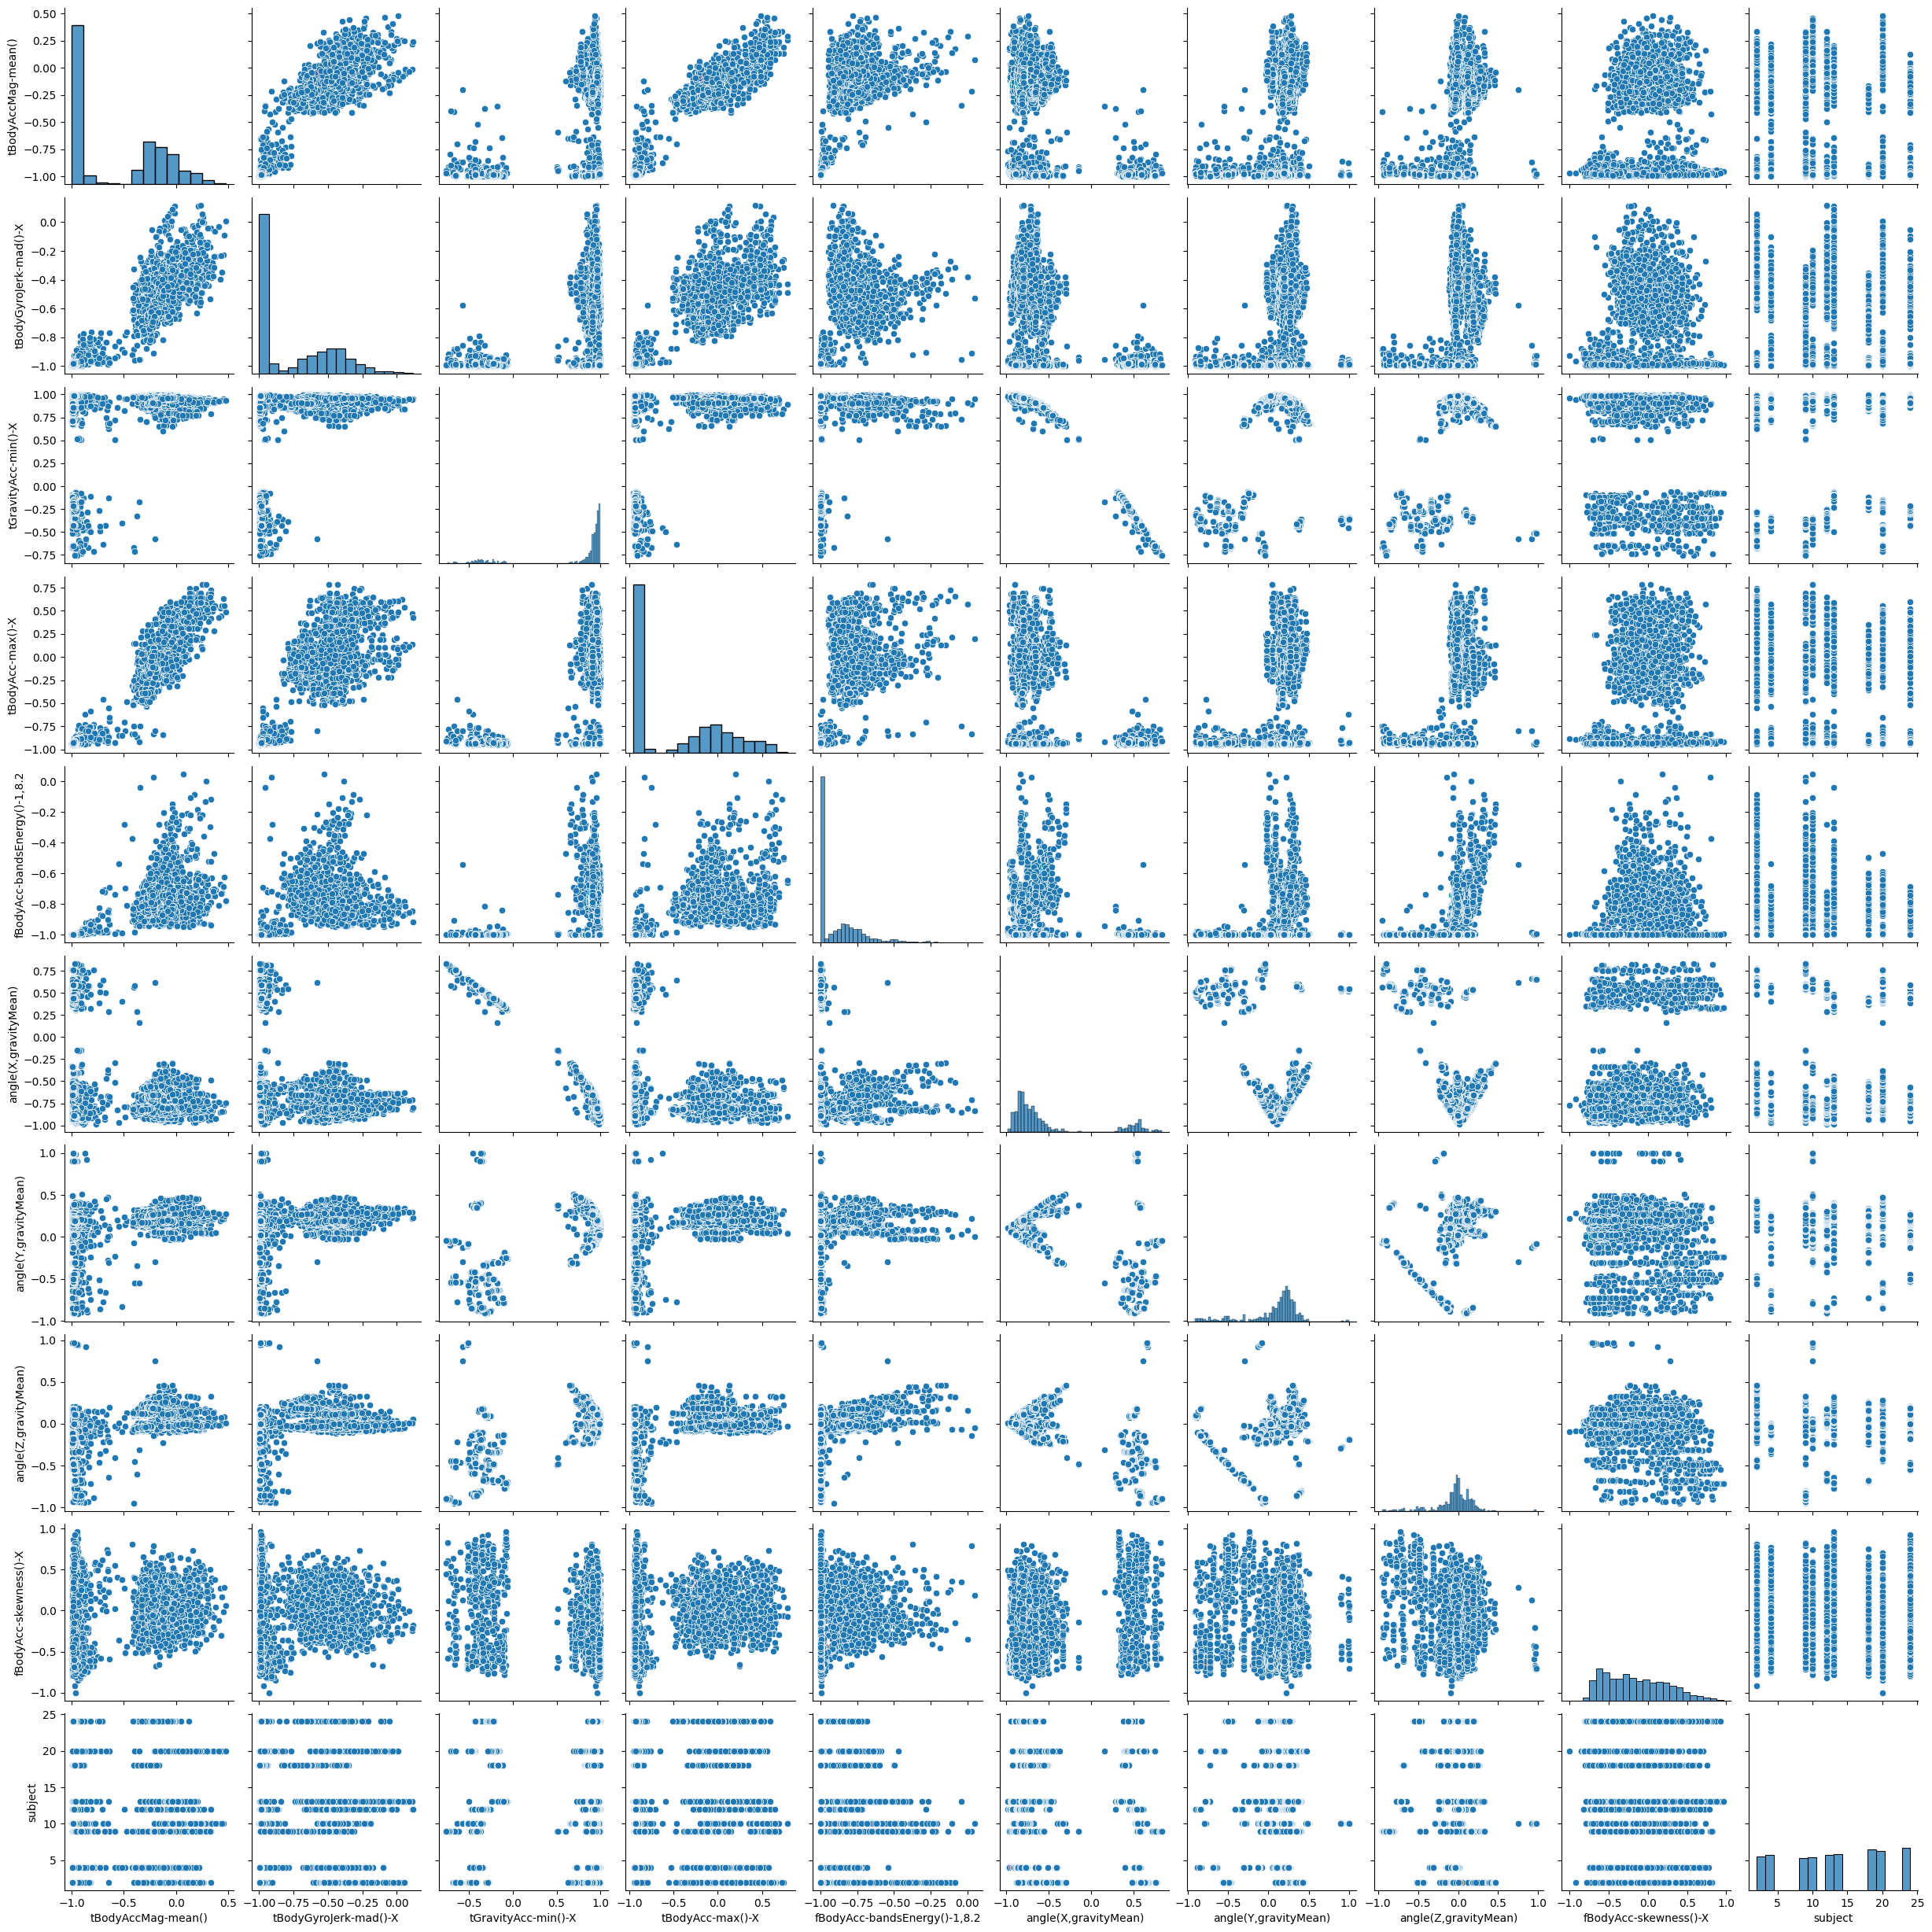

In [24]:
sns.pairplot(test);

__Вывод по графику__:
* Не по всем испытуемым есть данные (отсутствуют данные, например, по испытуемому номер 20 или ипытуемому номер 24)
* Распределение угла между осью Z и усредненной гравитационной составляющей ускорения похоже на нормальное, распределение угла между осью X и усредненной гравитационной составляющей ускорения бимодальное
* У первых пяти признаков - tBodyAccMag-mean(), tBodyGyroJerk-mad()-X,tGravityAcc-min()-X, tBodyAcc-max()-X, fBodyAcc-bandsEnergy()-1,8.2 - очень высокая сосредоточенность в крайних значениях диапазона

Анализировать неудобно...

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

__Первый вариант графика__

In [25]:
train_rus = train.copy()

train_rus = train_rus[['Activity', 'tBodyAccMag-mean()']]
train_rus['Activity'].replace({'STANDING': 'Стоять', 'SITTING':'Сидеть', 'LAYING':'Лежать', 'WALKING':'Ходить', 'WALKING_DOWNSTAIRS':'Спускаться', 'WALKING_UPSTAIRS':'Подниматься'}, inplace = True)

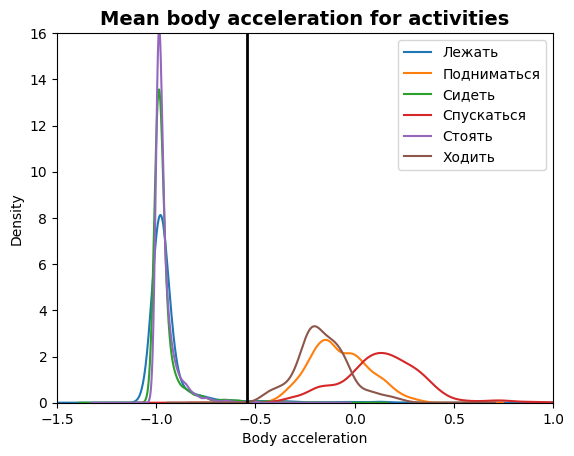

In [26]:
train_rus.groupby('Activity')['tBodyAccMag-mean()'].plot(kind = 'kde')
plt.title('Mean body acceleration for activities', fontsize = 14,  fontweight="bold")
plt.xlabel('Body acceleration')
plt.ylabel('Density')
plt.legend()
plt.xlim(-1.5, 1)
plt.ylim(0, 16)
plt.axvline(train['tBodyAccMag-mean()'].mean(), linewidth = 2, color = 'black');

__Второй вариант графика__

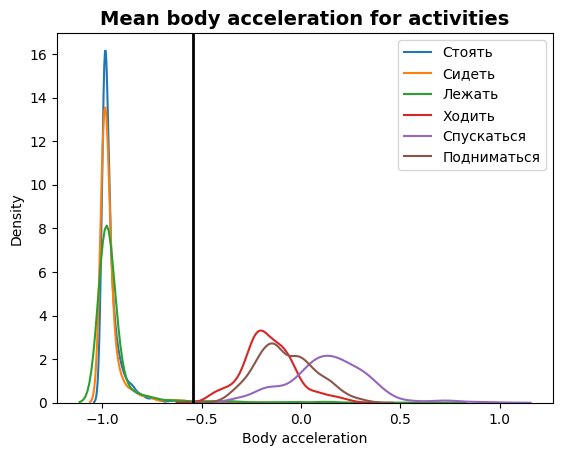

In [27]:
sns.kdeplot(train[train['Activity'] == 'STANDING'], x = 'tBodyAccMag-mean()', label = 'Стоять')
sns.kdeplot(train[train['Activity'] == 'SITTING'], x = 'tBodyAccMag-mean()', label = 'Сидеть')
sns.kdeplot(train[train['Activity'] == 'LAYING'], x = 'tBodyAccMag-mean()', label = 'Лежать')
sns.kdeplot(train[train['Activity'] == 'WALKING'], x = 'tBodyAccMag-mean()', label = 'Ходить')
sns.kdeplot(train[train['Activity'] == 'WALKING_DOWNSTAIRS'], x = 'tBodyAccMag-mean()', label = 'Спускаться')
sns.kdeplot(train[train['Activity'] == 'WALKING_UPSTAIRS'], x = 'tBodyAccMag-mean()', label = 'Подниматься')
plt.title('Mean body acceleration for activities', fontsize = 14,  fontweight="bold")
plt.xlabel('Body acceleration')
plt.ylabel('Density')
plt.legend()
line = train['tBodyAccMag-mean()'].mean()
plt.axvline(train['tBodyAccMag-mean()'].mean(), linewidth = 2, color = 'black');

In [28]:
less = train[(train['tBodyAccMag-mean()'] < line) & (train['Activity'].isin(['STANDING', 'SITTING', 'LAYING']))]['tBodyAccMag-mean()'].count()
all_static = train[(train['Activity'].isin(['STANDING', 'SITTING', 'LAYING']))]['tBodyAccMag-mean()'].count()
print('Доля правильных ответов для статических активностей', less / all_static)
more = train[(train['tBodyAccMag-mean()'] > line) & (train['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))]['tBodyAccMag-mean()'].count()
all_dynamic = train[(train['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))]['tBodyAccMag-mean()'].count()
print('Доля правильных ответов для динамических активностей', more/ all_dynamic)

Доля правильных ответов для статических активностей 0.9837718219818048
Доля правильных ответов для динамических активностей 1.0


__Второй способ поделить__

In [29]:
expected_value = train[(train['tBodyAccMag-mean()'] < line) & (train['Activity'].isin(['STANDING', 'SITTING', 'LAYING']))]['tBodyAccMag-mean()'].mean()
std = train[(train['tBodyAccMag-mean()'] < line) & (train['Activity'].isin(['STANDING', 'SITTING', 'LAYING']))]['tBodyAccMag-mean()'].std()
line = expected_value+ 3*std

In [30]:
less = train[(train['tBodyAccMag-mean()'] < line) & (train['Activity'].isin(['STANDING', 'SITTING', 'LAYING']))]['tBodyAccMag-mean()'].count()
all_static = train[(train['Activity'].isin(['STANDING', 'SITTING', 'LAYING']))]['tBodyAccMag-mean()'].count()
print('Доля правильных ответов для статических активностей', less / all_static)
more = train[(train['tBodyAccMag-mean()'] > line) & (train['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))]['tBodyAccMag-mean()'].count()
all_dynamic = train[(train['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))]['tBodyAccMag-mean()'].count()
print('Доля правильных ответов для динамических активностей', more/ all_dynamic)

Доля правильных ответов для статических активностей 0.9559872141627735
Доля правильных ответов для динамических активностей 1.0


__Вывод по первому способу деления__: Так как две группы сосредоточены в своих отдаленных друг от друга областях и распределение бимодальное, то среднее может поделить группы с большой точностью. Но он не идеален из-за выбросов для статических активностей, которые уменьшили долю правильных ответов

__Вывод по второму способу деления__: так как распределение статических активностей похоже на нормальное, то было сделано предположение, что отклонение от среднего в три стандартных отклонения позволит получить 96 процентов объектов. Однако из-за того, что были выбросы, далеко отошедшие от среднего в сторону положительных значений, результат получился хуже, чем при использовании среднего

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

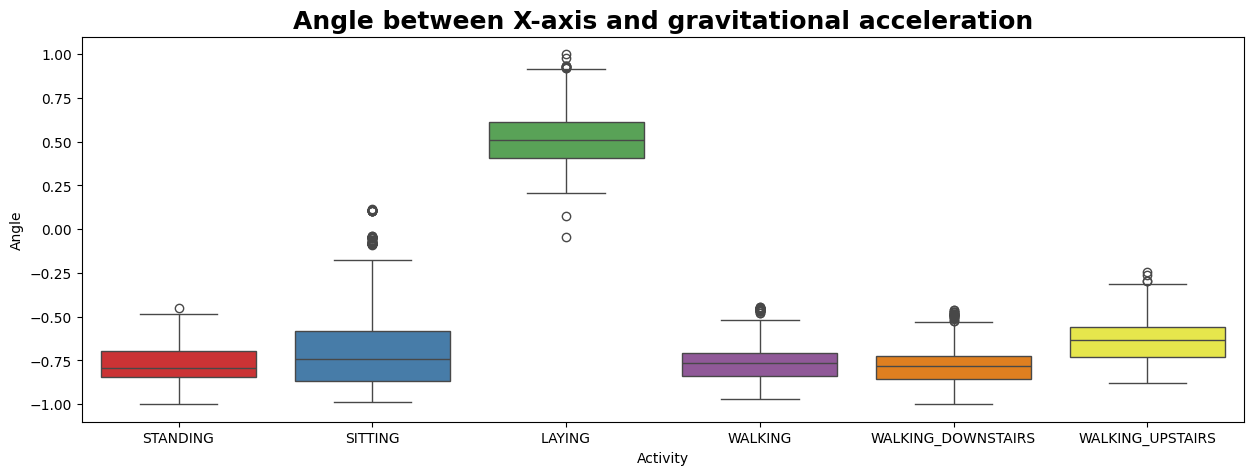

In [31]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = train, x = 'Activity', y = 'angle(X,gravityMean)', palette="Set1")
plt.xlabel('Activity')
plt.ylabel('Angle')
plt.title('Angle between X-axis and gravitational acceleration', fontsize = 18, fontweight="bold");

In [32]:
#тут расчеты
IQR_laying = train[train['Activity'] == 'LAYING']['angle(X,gravityMean)'].quantile(0.75) - train[train['Activity'] == 'LAYING']['angle(X,gravityMean)'].quantile(0.25)
lower = train[train['Activity'] == 'LAYING']['angle(X,gravityMean)'].quantile(0.25) - 1.5*IQR_laying
lower_bound = train[(train['Activity'] == 'LAYING')& (train['angle(X,gravityMean)'] < train[train['Activity'] == 'LAYING']['angle(X,gravityMean)'].quantile(0.25)) & ( train['angle(X,gravityMean)'] > lower)]['angle(X,gravityMean)'].min()

__Второй способ__:

In [33]:
df = pd.DataFrame({
    'STANDING':train[train['Activity'] == 'STANDING']['angle(X,gravityMean)'],
    'SITTING': train[train['Activity'] == 'SITTING']['angle(X,gravityMean)'],
    'LAYING':train[train['Activity'] == 'LAYING']['angle(X,gravityMean)'],
    'WALKING':train[train['Activity'] == 'WALKING']['angle(X,gravityMean)'],
    'WALKING_DOWNSTAIRS':train[train['Activity'] == 'WALKING_DOWNSTAIRS']['angle(X,gravityMean)'],
    'WALKING_UPSTAIRS':train[train['Activity'] == 'WALKING_UPSTAIRS']['angle(X,gravityMean)']
})

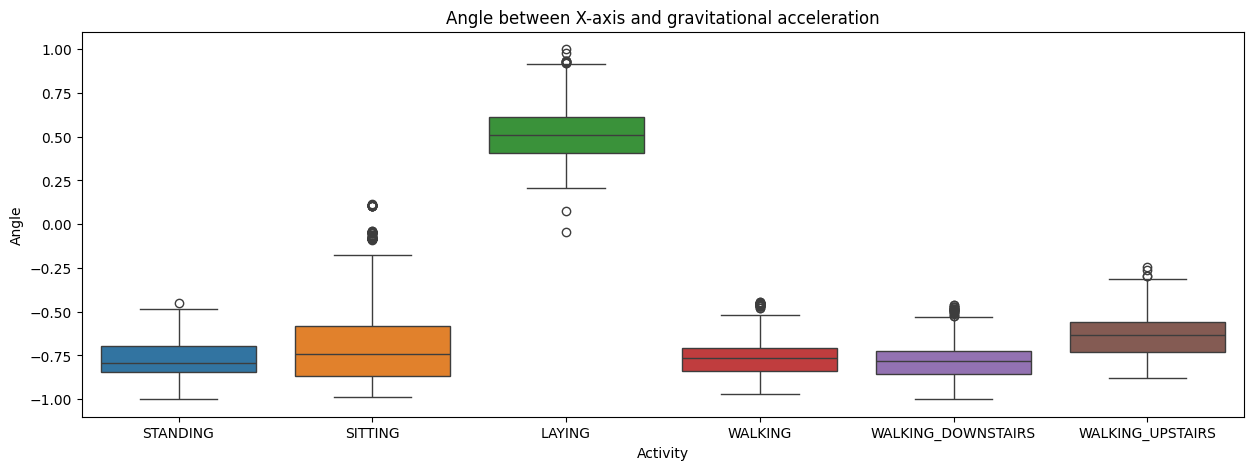

In [34]:
plt.figure(figsize=(15, 5), dpi=100)
sns.boxplot(df)
plt.xlabel('Activity')
plt.ylabel('Angle')
plt.title('Angle between X-axis and gravitational acceleration');

__Вывод по графику:__
Сильно выбивается категория активностей 'Лежать': угол между осью Х и усредненной гравитационной составляющей ускорения больше всего среди других активностей , причем единственный принимает в основном положительные значения. Возможно, это из-за того, что эта активность - единственная, которая находится предполагает нахождение в горизонтальном положении, также расстояние между объектом кровать и человеком минимальна, поэтому по формуле $F = \frac{GMm}{r^2}$, где М и m - массы тела, r - расстояние между ними, сила взаимного гравитационного притяжения между объектами наибольшая

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

__Первый способ__

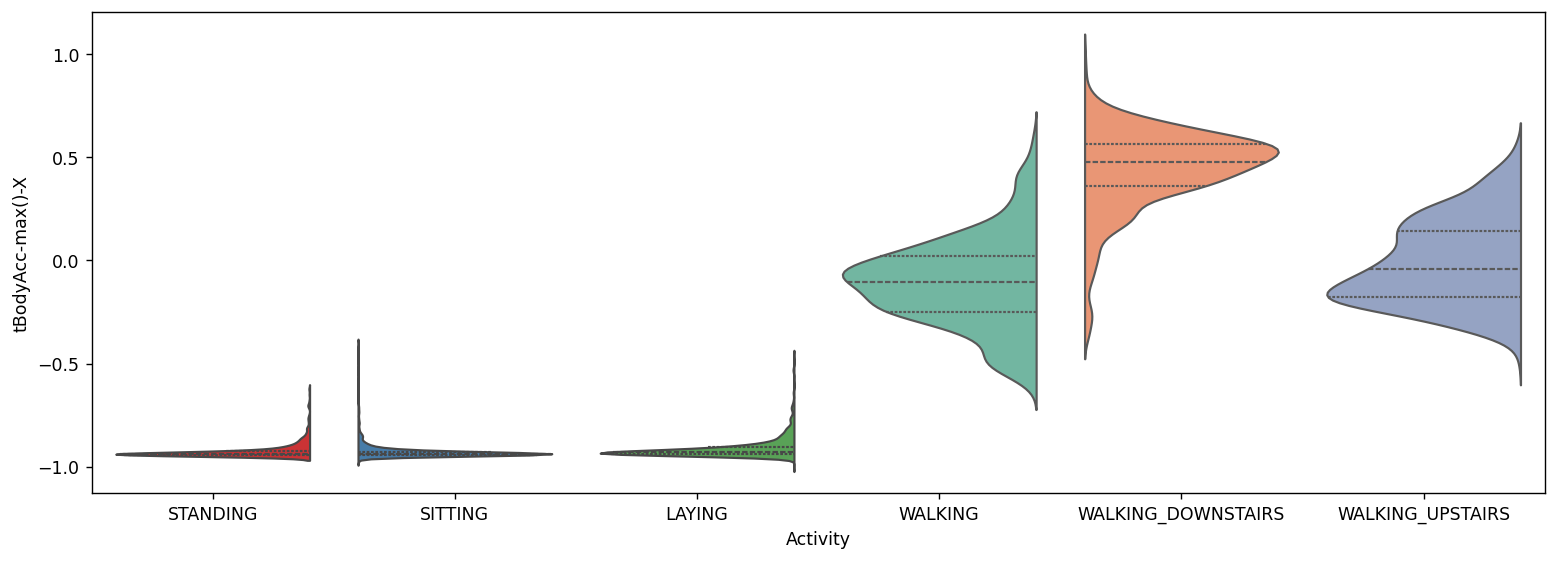

In [38]:
plt.figure(figsize = (15, 5), dpi = 125)
sns.violinplot(data = train[train['Activity'].isin(['SITTING', 'LAYING', 'STANDING'])], x = 'Activity', y = 'tBodyAcc-max()-X', inner = 'quart', split = True, palette = 'Set1')
sns.violinplot(data = train[train['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'])], x = 'Activity', y = 'tBodyAcc-max()-X', inner = 'quart', split = True, palette = 'Set2');

__Второй способ__

In [39]:
df = pd.DataFrame({
    'STANDING':train[train['Activity'] == 'STANDING']['tBodyAcc-max()-X'],
    'SITTING': train[train['Activity'] == 'SITTING']['tBodyAcc-max()-X'],
    'LAYING':train[train['Activity'] == 'LAYING']['tBodyAcc-max()-X'],
    'WALKING':train[train['Activity'] == 'WALKING']['tBodyAcc-max()-X'],
    'WALKING_DOWNSTAIRS':train[train['Activity'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-max()-X'],
    'WALKING_UPSTAIRS':train[train['Activity'] == 'WALKING_UPSTAIRS']['tBodyAcc-max()-X']
})

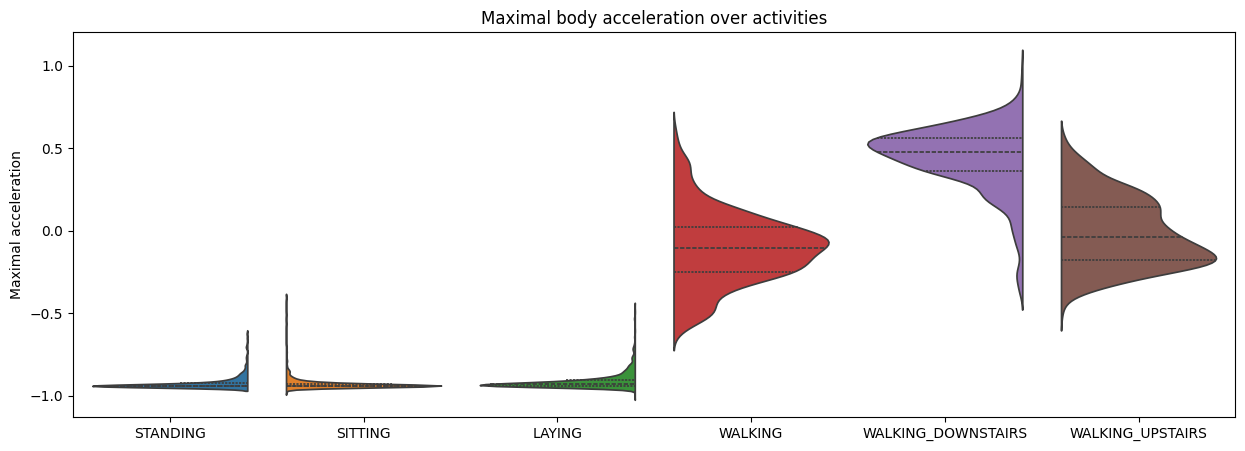

In [40]:
plt.figure(figsize=(15, 5), dpi=100)

sns.violinplot(df, split = True, inner="quart")
plt.ylabel('Maximal acceleration')
plt.title('Maximal body acceleration over activities');

In [41]:
#тут расчеты
quantile_WD = train[train['Activity'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-max()-X'].quantile(0.25)
all = train[train['tBodyAcc-max()-X'] > quantile_WD]['Activity'].count()
right = train[(train['tBodyAcc-max()-X'] > quantile_WD) & ( train['Activity'] == 'WALKING_DOWNSTAIRS')]['Activity'].count()
print(right / all)
print(quantile_WD)

0.8892900120336944
0.36086475


__Вывод по графику:__ Выделяется активность "Спускаться" - ее распределение находится выше остальных (в основном). Возможно, из-за того, что обычно при движении вниз по лестницам происходит более значительное ускорение, чем в статических или трудных движениях, то поэтому здесь максимальное ускорение выше

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

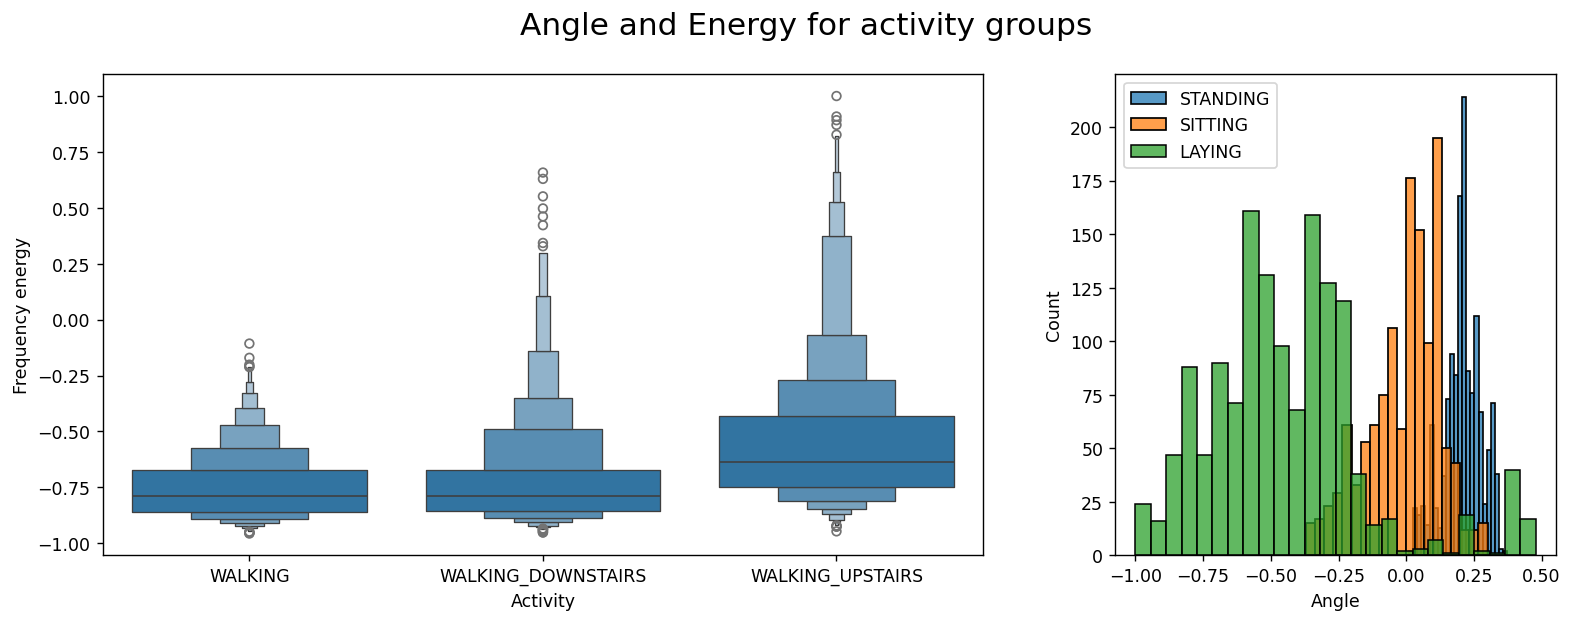

In [42]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (15, 5), dpi = 125)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig, width_ratios=[2, 1])
ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1])
sns.boxenplot(data = train[train['Activity'].isin(['WALKING', "WALKING_DOWNSTAIRS", 'WALKING_UPSTAIRS'])], x = 'Activity', y = 'fBodyAcc-bandsEnergy()-1,8.2', ax = ax1)
sns.histplot(data = train[train['Activity'] == 'STANDING']['angle(Y,gravityMean)'], ax = ax2, label = 'STANDING')
sns.histplot(data = train[train['Activity'] == 'SITTING']['angle(Y,gravityMean)'], ax = ax2,label = 'SITTING')
sns.histplot(data = train[train['Activity'] == 'LAYING']['angle(Y,gravityMean)'], ax = ax2, label = 'LAYING')
plt.legend()
ax2.set_xlabel('Angle')
ax1.set_ylabel('Frequency energy')
plt.suptitle('Angle and Energy for activity groups', fontsize = 18, fontweight = 2);

In [43]:
№тут расчеты
WU = train[ (train['Activity'] == 'WALKING_UPSTAIRS') & (train['fBodyAcc-bandsEnergy()-1,8.2'] > -0.6365831)]['Activity'].count()
all_WU = train[ (train['Activity'] == 'WALKING_UPSTAIRS')]['Activity'].count()
all = train[ (train['Activity'].isin( ['WALKING_UPSTAIRS', 'WALKING'])) & (train['fBodyAcc-bandsEnergy()-1,8.2'] > -0.6365831)]['Activity'].count()
WU / all

0.6828025477707006

In [44]:
train[train['Activity'] == 'SITTING']['angle(Y,gravityMean)'].max()

0.30034935

In [45]:
sitting = train[train['Activity'] == 'SITTING']['angle(Y,gravityMean)'].count()
standing = train[train['Activity'] == 'STANDING']['angle(Y,gravityMean)'].count()
right = train[(train['Activity'] == 'STANDING')&(train['angle(Y,gravityMean)'] < 0.30034935) & (train['angle(Y,gravityMean)'] > 0.14)]['angle(Y,gravityMean)'].count()
print(right / standing)
wrong = train[(train['Activity'] == 'SITTING')&(train['angle(Y,gravityMean)'] < 0.30034935) & (train['angle(Y,gravityMean)'] > 0.14)]['angle(Y,gravityMean)'].count()
print(wrong / sitting)

0.764919941775837
0.08942457231726283


__Вывод по графику:__
* В среднем энергия ускорения тела в интервале частоты среди динамических активностей чуть-чуть повыше у активности "Подниматься", однако разница незначительна
* Среди динамических можно выделить активность "Подниматься" - ее описательные статистики имеют более высокие значения, чем у других
* Среди статических активность можно выделить активность "Стоять": она имеет более сконцентрированное распределение и сосредоточена в диапазоне 0.00-0.40

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

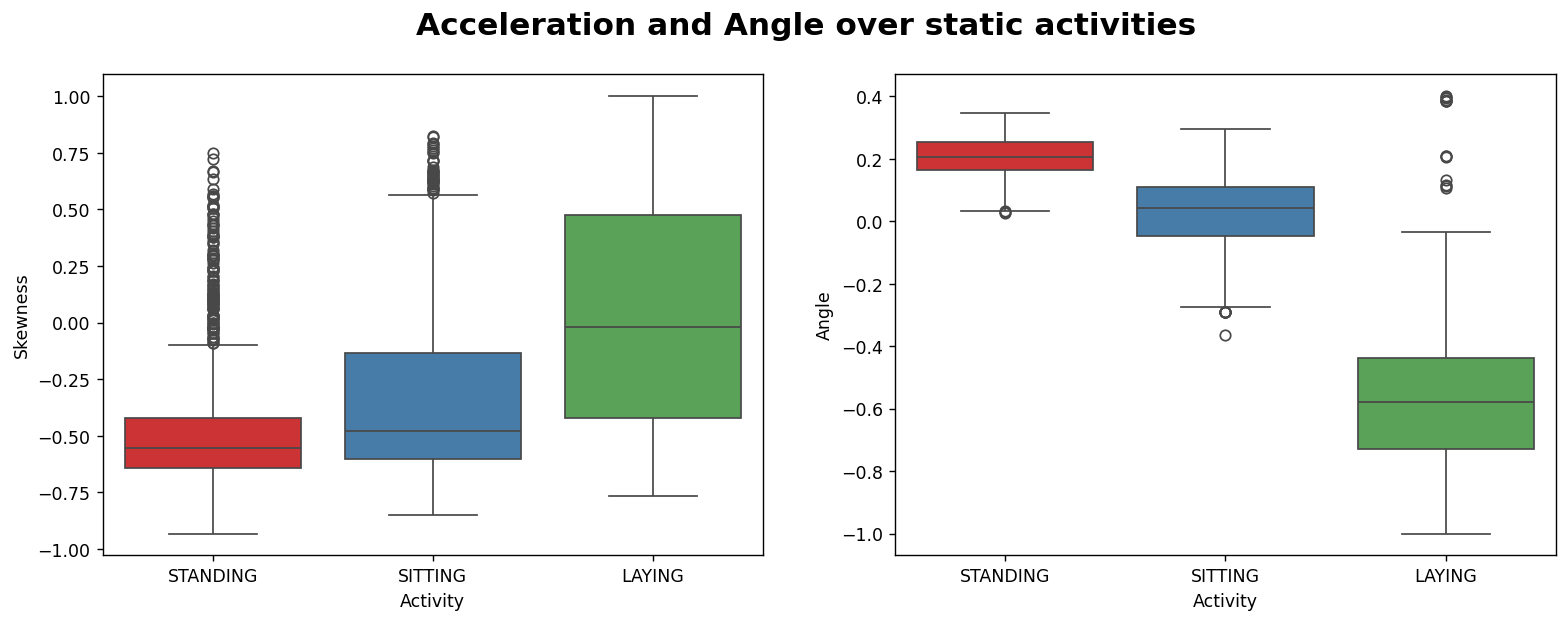

In [46]:
fig = plt.figure(figsize = (15, 5), dpi = 125)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1])

sns.boxplot(data = train[train['Activity'].isin(['STANDING', 'SITTING', 'LAYING'])], x = 'Activity', y = 'fBodyAcc-skewness()-X', ax = ax1, palette="Set1")
ax1.set_ylabel('Skewness')
sns.boxplot(data = train[(train['Activity'].isin(['STANDING', 'SITTING', 'LAYING']))& (train['fBodyAcc-skewness()-X'] < -0.376)], x = 'Activity', y = 'angle(Y,gravityMean)', ax = ax2, palette="Set1")
ax2.set_ylabel('Angle')
plt.suptitle('Acceleration and Angle over static activities', fontsize = 18, fontweight = 'bold');

In [ ]:
#тут расчеты
train[ (train['Activity'] == 'STANDING') & ( train['fBodyAcc-skewness()-X'] < -0.376 )]['angle(Y,gravityMean)'].quantile(0.25)

0.165014775

__Вывод по графику:__
* На первом графике можно увидеть, что асимметричность частоты ускорения тела по оси Х больше всего сконцентрирована у активности "Стоять", однако при этом наблюдается много выбросов, у активности "Лежать", наоборот, большой разброс значений, которые имеют большую частоту встречаемости, но выбросов нет.
* В целом, выделяется активность "Лежать": она имеет самую высокую медиану по асимметричности частоты ускорения тела по оси Х и самую низкую по углу между осью Y и усредненной гравитационной составляющей ускорения для наблюдений, с ассиметричностью ниже -0.376
* Также можно выделить активность "Стоять"

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

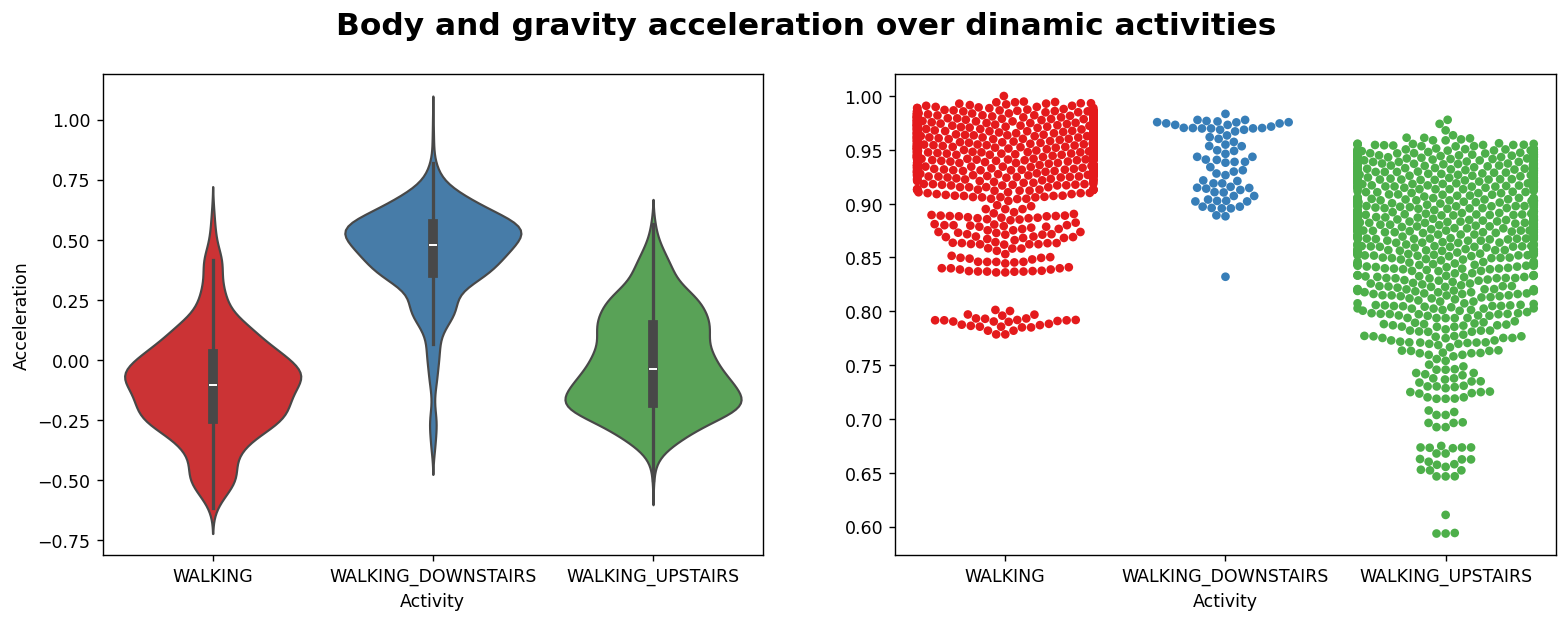

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5), dpi = 125)

sns.violinplot(data = train[train['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'])] , x = 'Activity', y = 'tBodyAcc-max()-X', ax = ax1, palette="Set1")
sns.swarmplot( data =   train[(train['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))& (train['tBodyAcc-max()-X'] < 0.157)] , x = 'Activity', y = 'tGravityAcc-min()-X', ax = ax2, palette="Set1" )
ax1.set_ylabel('Acceleration')
ax2.set_ylabel('')
plt.suptitle('Body and gravity acceleration over dinamic activities', fontsize = 18, fontweight = 'bold');

In [48]:
train[(train['Activity'] == 'WALKING_UPSTAIRS') & (train['tBodyAcc-max()-X'] < 0.157)]['tGravityAcc-min()-X'].max()

0.97790656

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [49]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 7min 14s, sys: 978 ms, total: 7min 15s
Wall time: 4min 16s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [50]:
!pip install plotly-express

In [51]:
import plotly_express as px

In [52]:
px.scatter(df_2_comp, x = 'x', y = 'y', color = 'Activity')

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [53]:
px.scatter_3d(df_3_comp, x = 'x', y = 'y', z = 'z', color = 'Activity')

__Структура__ Динамические активности плотно пересекаются друг с другом, формируя единый кластер. В статических активностях сильно отделяется активность "Лежать", две другие также сильно переплетаются между собой

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [54]:
def predict(df: pd.DataFrame):
    predictions = []
    for row in df.index.values:
        if df.loc[row, 'angle(X,gravityMean)'] > 0.20575936:
            predictions.append('LAYING')
        elif df.loc[row, 'tBodyAcc-max()-X'] > 0.36086475:
            predictions.append('WALKING_DOWNSTAIRS')
        elif df.loc[row, 'tBodyAccMag-mean()'] < -0.54:
            if df.loc[row, 'angle(Y,gravityMean)'] > 0.11 and df.loc[row, 'angle(Y,gravityMean)'] < 0.30034935:
                predictions.append('STANDING')
            elif df.loc[row, 'fBodyAcc-skewness()-X'] < -0.376 and df.loc[row, 'angle(Y,gravityMean)'] > 0.12:
                predictions.append('STANDING')
            else:
                 predictions.append('SITTING')
        else:
            if df.loc[row, 'tBodyAcc-max()-X'] < 0.157 and df.loc[row, 'tGravityAcc-min()-X'] > 0.9:
                predictions.append('WALKING')
            elif df.loc[row, 'tBodyAcc-max()-X'] < 0.157 and df.loc[row, 'tGravityAcc-min()-X'] < 0.85:
                predictions.append('WALKING_UPSTAIRS')
            elif df.loc[row, 'fBodyAcc-bandsEnergy()-1,8.2'] > -0.6365831:
                predictions.append('WALKING_UPSTAIRS')
            else:
                predictions.append('WALKING')
    return predictions

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()


In [55]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.7996463547334058
Accuracy on test set => 0.7502544960977265


__Место для мема и/или фидбэка__